In [1]:
import os
import sys
import warnings

import pdb

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from xgboost import XGBRegressor

from sklearn import tree

from utils import MySet

from utils import local_data
from utils import window
from utils import Scale, give_error
from utils import generate_and_avaliate_model

from utils import location_station, find_set_sunrise, find_set_sunset

%matplotlib inline
warnings.filterwarnings('ignore')

latter_size = 14
plt.rcParams['legend.fontsize'] = latter_size 
plt.rcParams['font.size'] = latter_size 
plt.rcParams['axes.labelsize'] = latter_size
plt.rcParams['xtick.labelsize'] = latter_size
plt.rcParams['ytick.labelsize'] = latter_size

In [2]:
df = pd.read_pickle('./data/sj2_analise_update.pkl')

In [3]:
df.columns

Index(['vtec', 'vtec_dt', 'vtec_dt2', 'gvtec1', 'gvtec1_dt', 'gvtec2',
       'gvtec2_dt', 'state_night', 'state_dawn', 'vm1', 'vd1', 'vm2', 'vd2',
       'gvtec1_dt_lag_9', 'gvtec2_dt_lag_20', 'vtec_dt_lag_3', 's4'],
      dtype='object')

In [4]:
original = MySet('original', ['vtec', 'vtec_dt', 'vtec_dt2', 'gvtec1', 'gvtec1_dt', 'gvtec2', 'gvtec2_dt'])
tempo  = MySet('tempo', ['state_night', 'state_dawn'])
mdv1 = MySet('mdv1', ['vm1', 'vd1'])
mdv2 = MySet('mdv2', ['vm2', 'vd2'])
lag = MySet('lag', ['gvtec1_dt_lag_9', 'gvtec2_dt_lag_20'])

vtec = MySet('vtec', ['vtec'])
vtec_dt = MySet('vtec_dt', ['vtec_dt'])
vtec_dt2 = MySet('vtec_dt2', ['vtec_dt2'])
gvtec1 = MySet('gvtec1', ['gvtec1'])
gvtec1_dt = MySet('gvtec1_dt', ['gvtec1_dt'])
gvtec2 = MySet('gvtec2', ['gvtec2'])
gvtec2_dt = MySet('gvtec2_dt', ['gvtec2_dt'])
state_night = MySet('state_night', ['state_night'])
state_dawn = MySet('state_dawn', ['state_dawn'])
vm1 = MySet('vm1', ['vm1'])
vd1 = MySet('vd1', ['vd1'])
vm2 = MySet('vm2', ['vm2'])
vd2 = MySet('vd2', ['vd2'])
gvtec1_dt_lag_9 = MySet('gvtec1_dt_lag_9', ['gvtec1_dt_lag_9'])
gvtec2_dt_lag_20 = MySet('gvtec2_dt_lag_20', ['gvtec2_dt_lag_20'])

In [5]:
set_tests = [original,
             original-vtec,
             original-vtec_dt,
             original-gvtec1,
             original-gvtec1_dt,
             original-gvtec2,
             original-gvtec2_dt,
             original+tempo,
             original+gvtec1_dt_lag_9,
             original+gvtec2_dt_lag_20,
             original+lag,
             original+mdv1,
             original+mdv2,
             original+tempo+lag,
             original+tempo+mdv2,
             original+tempo+mdv2+lag,
             original+tempo+lag+mdv1+mdv2,
             vtec,
             vtec+gvtec1_dt_lag_9,
             vtec+gvtec2_dt_lag_20,
             vtec+vtec_dt+vtec_dt2,
             vtec+gvtec1+gvtec2,
             vtec+tempo,
             vtec+tempo+mdv1,
             vtec+tempo+lag,
             vtec+tempo+lag+mdv1,
             vtec+tempo+lag+mdv2,
             vtec+tempo+lag+mdv1+mdv2]

In [6]:
n_estimators = [int(x) for x in np.linspace(start=100, stop=3000, num=20)]
learning_rate = [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.2, 0.3]
max_depth = [int(x) for x in np.linspace(5, 20, num=15)]
subsample = [0.3, 0.5, 0.75, 1.0]
colsample_bytree = [i for i in range(0.3, 1.1, 0.1)]
colsample_bylevel = [i for i in range(0.3, 1.1, 0.1)]
min_child_weight = [i for i in range(0, 20)]
gamma = [i for i in range(0.0, 1.1, 0.1)]

param_grid = {'model__n_estimators': n_estimators,
              'model__max_depth': max_depth,
              'model__learning_rate': learning_rate,
              'model__max_depth': max_depth,
              'model__subsample': subsample,
              'model__colsample_bytree': colsample_bytree,
              'model__colsample_bylevel': colsample_bylevel,
              'model__min_child_weight': min_child_weight,
              'model__gamma': gamma}

0  ->  original
Error for the time series sample:
acc             0.872647
f1              0.495051
far             0.336471
fn             53.800000
fp             17.900000
kappa           0.079407
me              0.366544
mse             0.004437
pod             0.395506
precission      0.663529
re             23.105748
recall          0.395506
tn            456.100000
tp             35.200000
tse             1.580269
dtype: float64


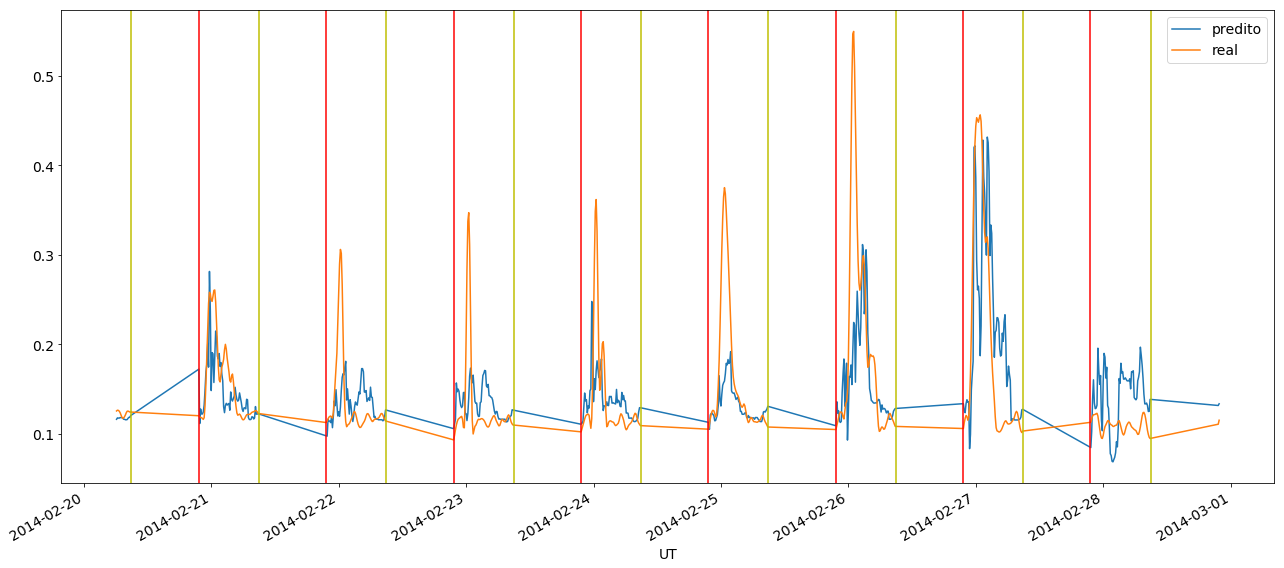


1  ->  original - vtec
Error for the time series sample:
acc             0.857726
f1              0.546202
far             0.447186
fn             40.800000
fp             39.300000
kappa           0.061945
me              0.328824
mse             0.004690
pod             0.541573
precission      0.552814
re             29.879150
recall          0.541573
tn            434.700000
tp             48.200000
tse             1.624724
dtype: float64


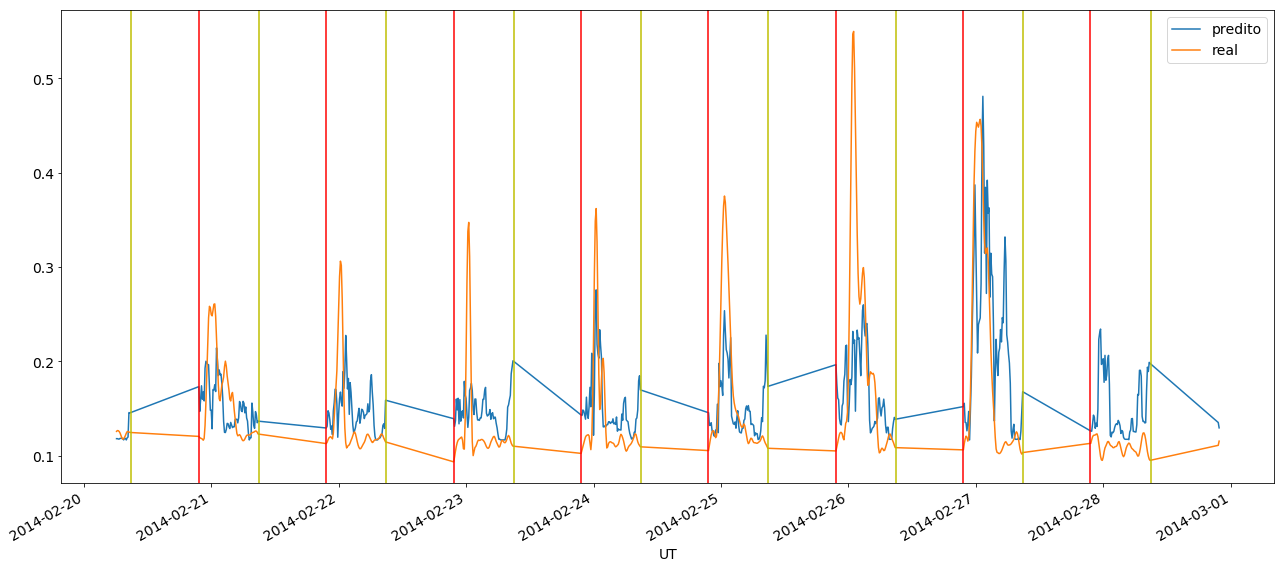


2  ->  original - vtec_dt
Error for the time series sample:
acc             0.874245
f1              0.520646
far             0.344351
fn             50.300000
fp             20.500000
kappa           0.074551
me              0.356739
mse             0.004481
pod             0.434831
precission      0.655649
re             23.619543
recall          0.434831
tn            453.500000
tp             38.700000
tse             1.588156
dtype: float64


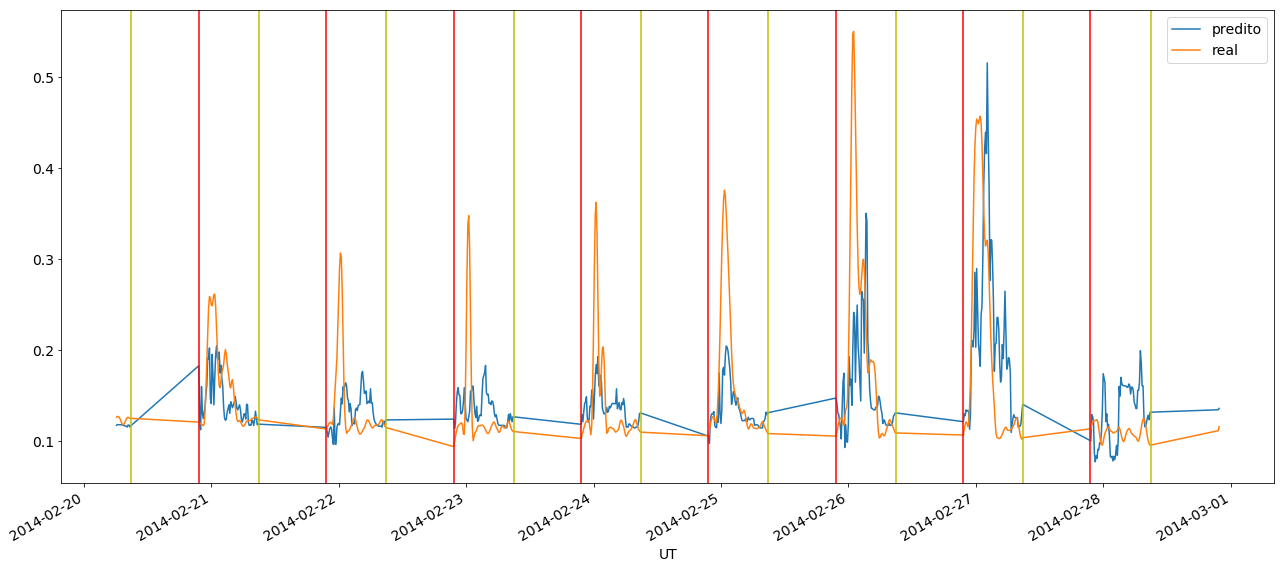


3  ->  original - gvtec1
Error for the time series sample:
acc             0.873357
f1              0.526950
far             0.352146
fn             49.300000
fp             22.000000
kappa           0.073096
me              0.372863
mse             0.004325
pod             0.446067
precission      0.647854
re             23.864553
recall          0.446067
tn            452.000000
tp             39.700000
tse             1.560025
dtype: float64


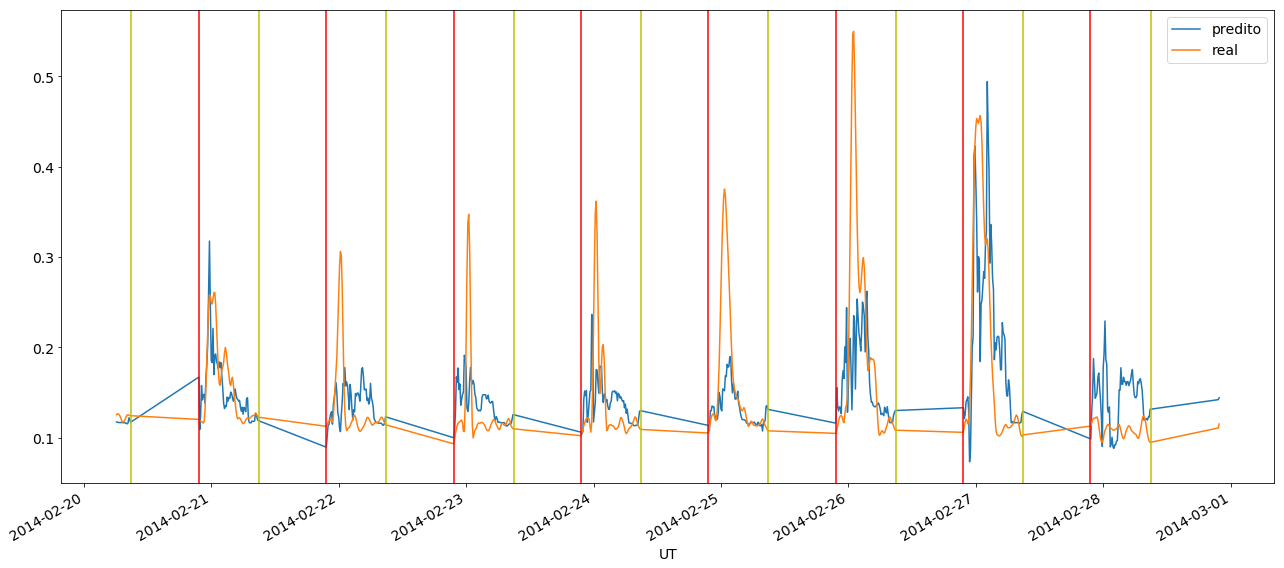


4  ->  original - gvtec1_dt
Error for the time series sample:
acc             0.872647
f1              0.459618
far             0.300320
fn             58.500000
fp             13.200000
kappa           0.086314
me              0.401241
mse             0.004679
pod             0.342697
precission      0.699680
re             22.270009
recall          0.342697
tn            460.800000
tp             30.500000
tse             1.622928
dtype: float64


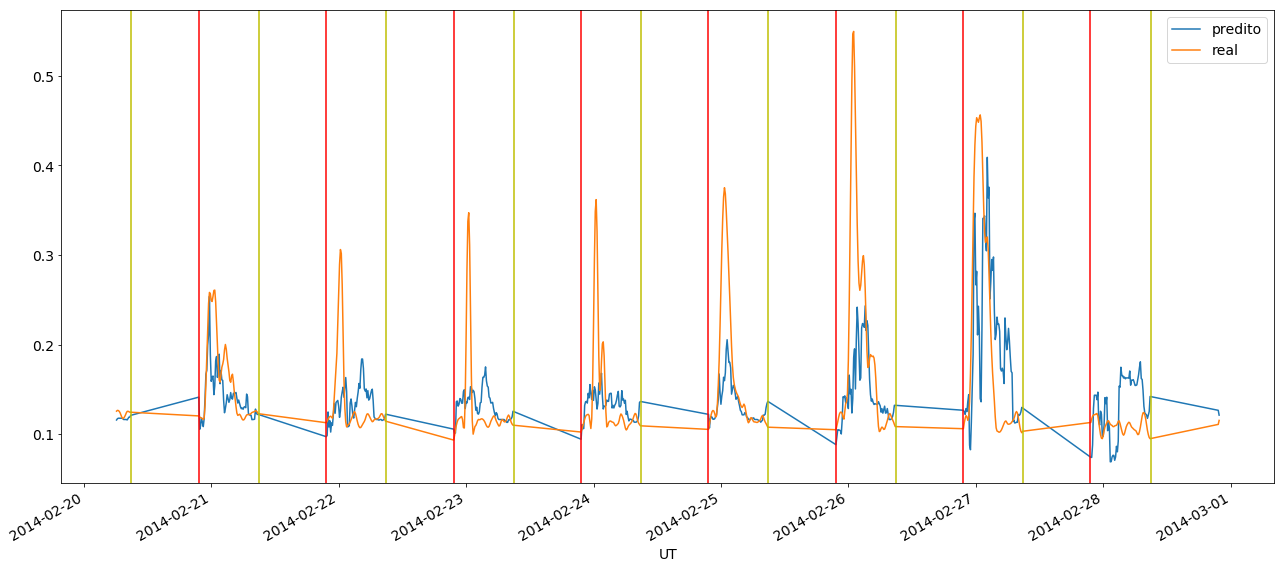


5  ->  original - gvtec2
Error for the time series sample:
acc             0.810835
f1              0.469742
far             0.578410
fn             41.700000
fp             64.800000
kappa           0.063532
me              0.332566
mse             0.005322
pod             0.531461
precission      0.421590
re             32.181621
recall          0.531461
tn            409.200000
tp             47.300000
tse             1.730815
dtype: float64


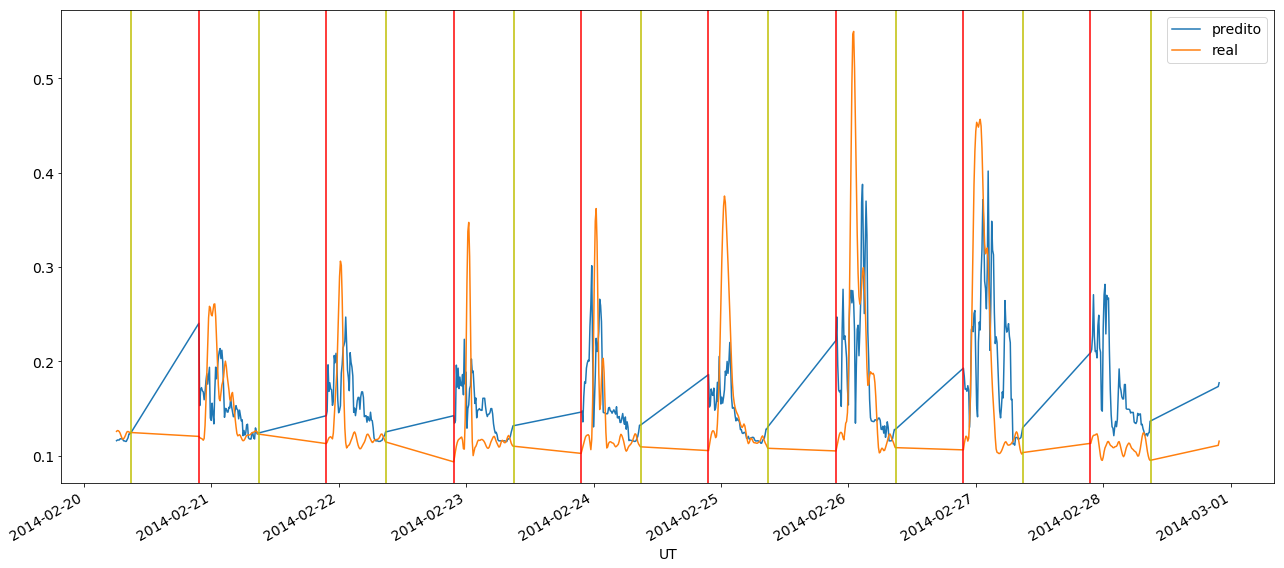


6  ->  original - gvtec2_dt
Error for the time series sample:
acc             0.877620
f1              0.510501
far             0.307143
fn             53.000000
fp             15.900000
kappa           0.078388
me              0.371419
mse             0.004503
pod             0.404494
precission      0.692857
re             22.740512
recall          0.404494
tn            458.100000
tp             36.000000
tse             1.592009
dtype: float64


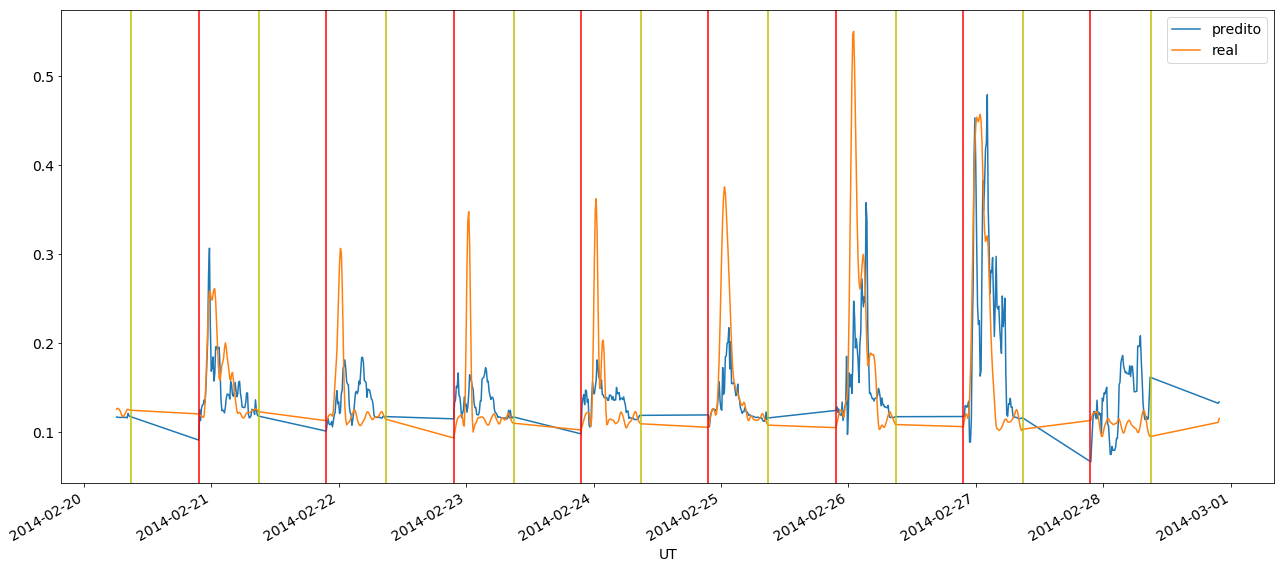


7  ->  original + tempo
Error for the time series sample:
acc             0.874778
f1              0.518087
far             0.339104
fn             51.000000
fp             19.500000
kappa           0.075476
me              0.363125
mse             0.004422
pod             0.426966
precission      0.660896
re             23.752518
recall          0.426966
tn            454.500000
tp             38.000000
tse             1.577691
dtype: float64


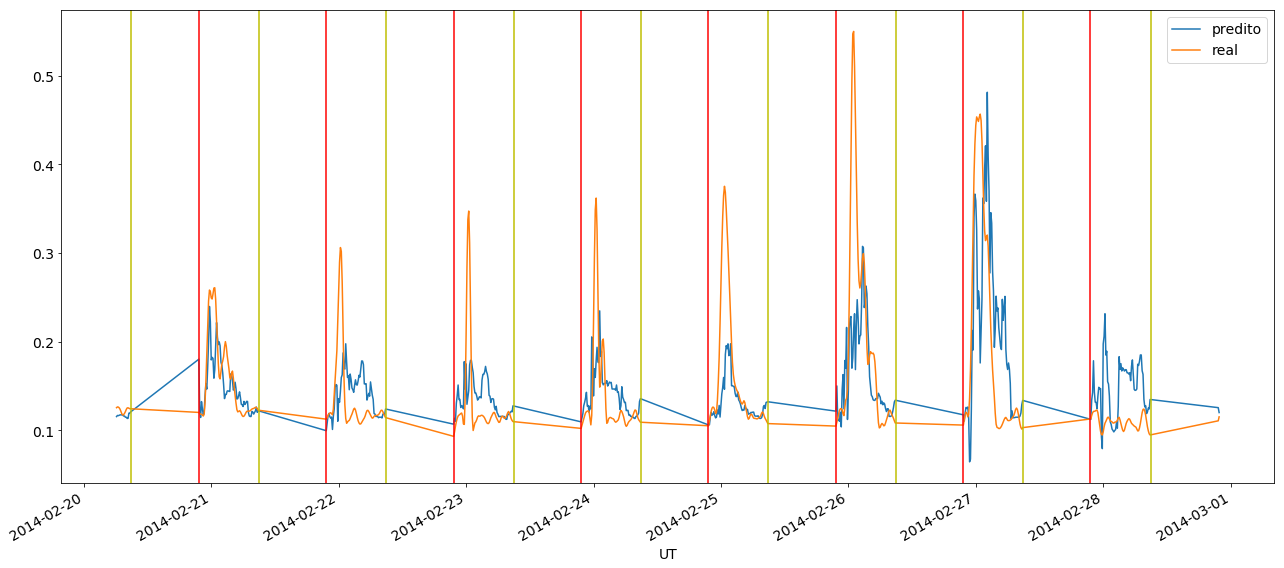


8  ->  original + gvtec1_dt_lag_9
Error for the time series sample:
acc             0.882948
f1              0.574441
far             0.323693
fn             44.500000
fp             21.400000
kappa           0.066545
me              0.364720
mse             0.004076
pod             0.500000
precission      0.676307
re             23.341044
recall          0.500000
tn            452.600000
tp             44.500000
tse             1.514634
dtype: float64


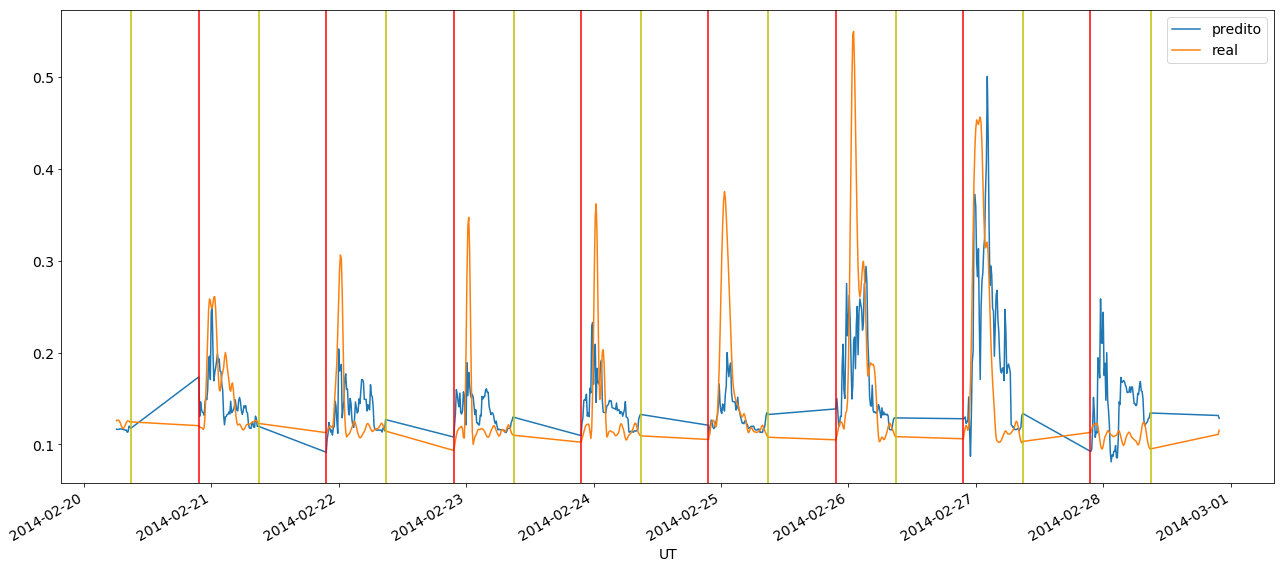


9  ->  original + gvtec2_dt_lag_20
Error for the time series sample:
acc             0.871048
f1              0.529395
far             0.373906
fn             48.100000
fp             24.500000
kappa           0.071400
me              0.357950
mse             0.004281
pod             0.459551
precission      0.626094
re             23.340205
recall          0.459551
tn            449.500000
tp             40.900000
tse             1.552321
dtype: float64


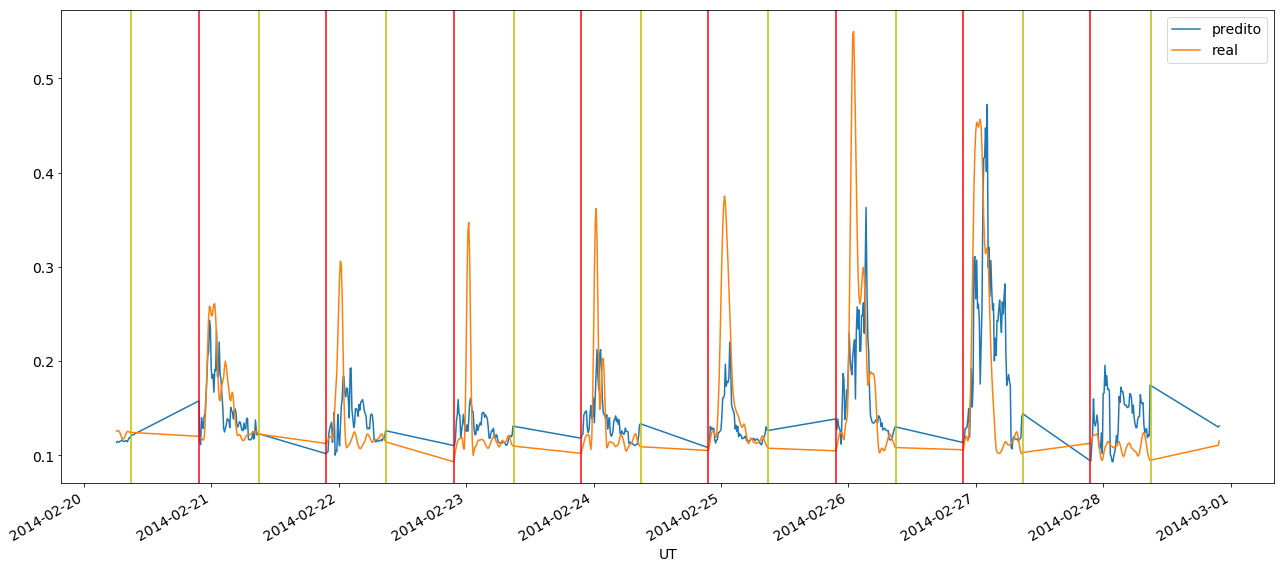


10  ->  original + lag
Error for the time series sample:
acc             0.871936
f1              0.561078
far             0.388259
fn             42.700000
fp             29.400000
kappa           0.064188
me              0.345488
mse             0.003964
pod             0.520225
precission      0.611741
re             23.587443
recall          0.520225
tn            444.600000
tp             46.300000
tse             1.493561
dtype: float64


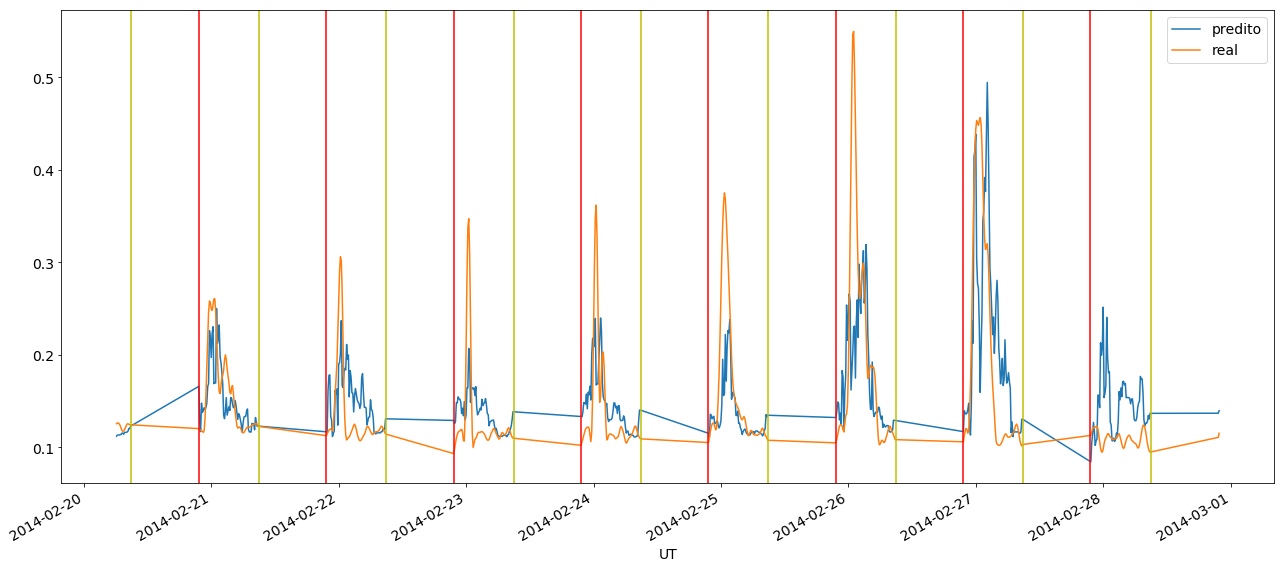


11  ->  original + mdv1
Error for the time series sample:
acc             0.879929
f1              0.621830
far             0.378880
fn             33.400000
fp             34.200000
kappa           0.052420
me              0.341198
mse             0.004208
pod             0.624719
precission      0.621120
re             26.461585
recall          0.624719
tn            439.800000
tp             55.600000
tse             1.539197
dtype: float64


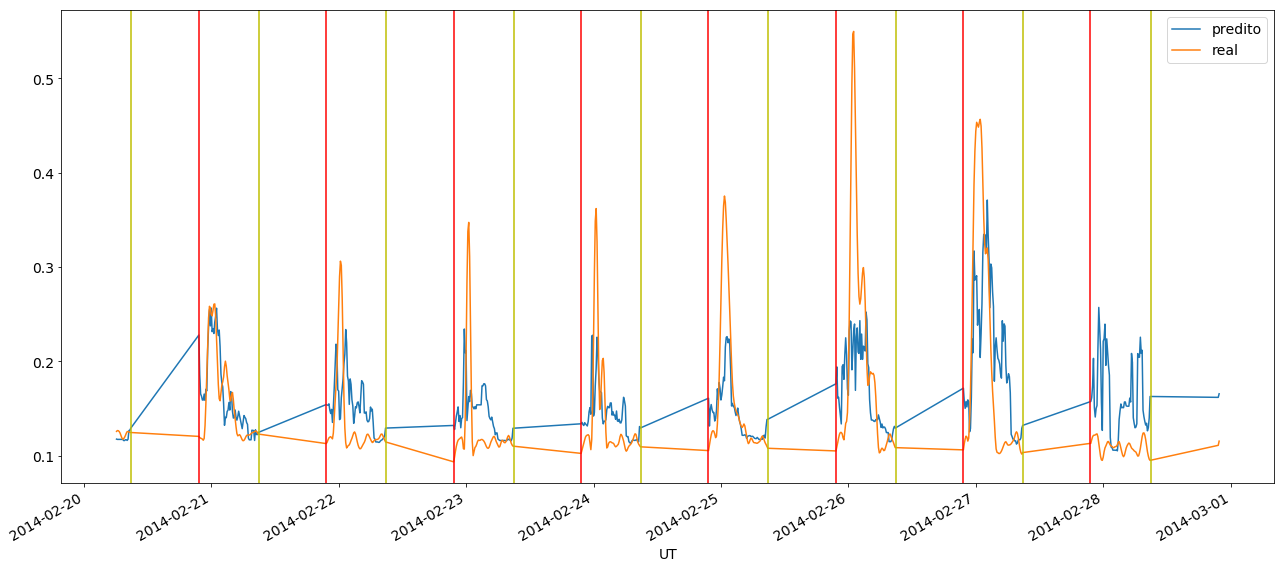


12  ->  original + mdv2
Error for the time series sample:
acc             0.884725
f1              0.579341
far             0.313542
fn             44.200000
fp             20.700000
kappa           0.066186
me              0.350325
mse             0.004151
pod             0.503371
precission      0.686458
re             23.789536
recall          0.503371
tn            453.300000
tp             44.800000
tse             1.528355
dtype: float64


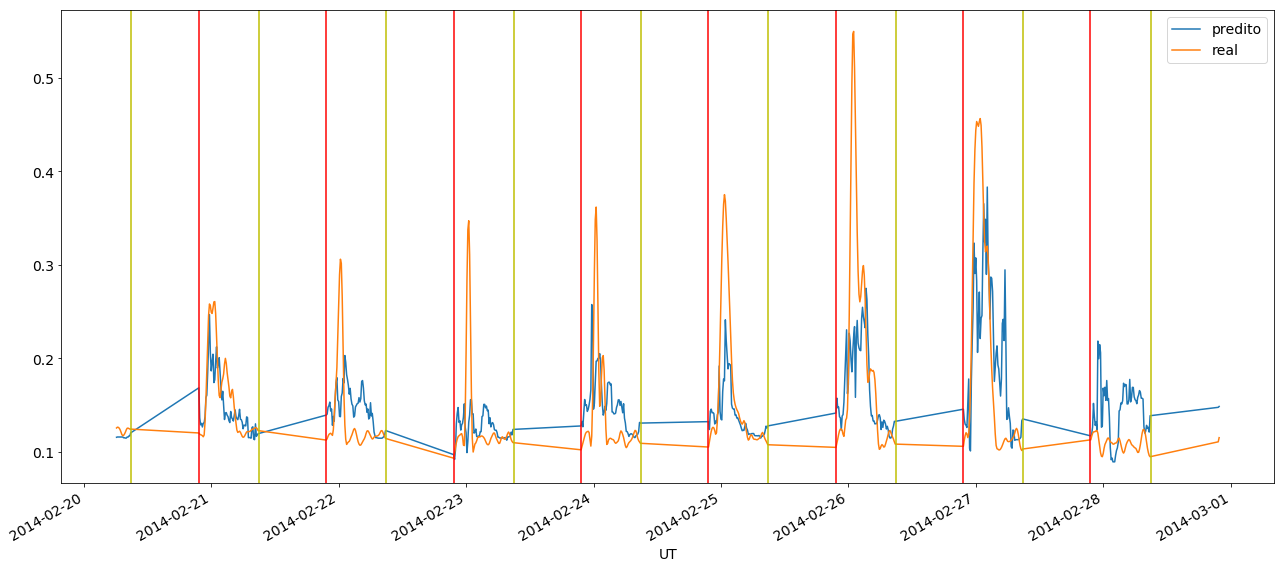


13  ->  original + tempo + lag
Error for the time series sample:
acc             0.878330
f1              0.586219
far             0.364005
fn             40.400000
fp             28.100000
kappa           0.061203
me              0.351738
mse             0.003942
pod             0.546067
precission      0.635995
re             23.300072
recall          0.546067
tn            445.900000
tp             48.600000
tse             1.489446
dtype: float64


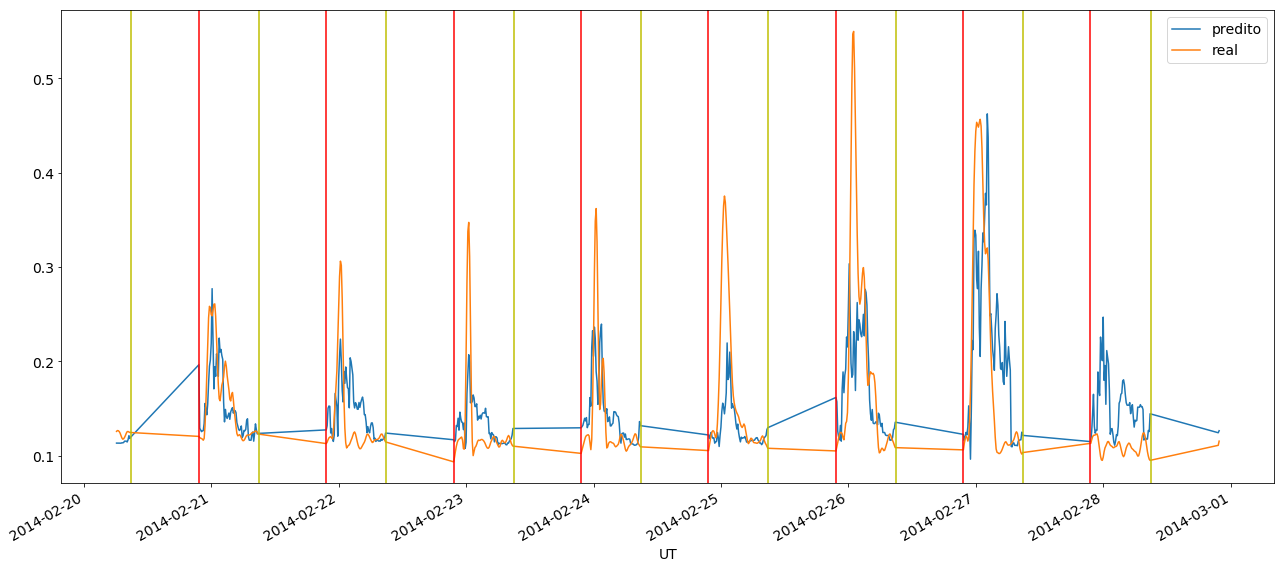


14  ->  original + tempo + mdv2
Error for the time series sample:
acc             0.887389
f1              0.593763
far             0.309352
fn             42.600000
fp             20.800000
kappa           0.063968
me              0.350800
mse             0.004248
pod             0.521348
precission      0.690648
re             24.578158
recall          0.521348
tn            453.200000
tp             46.400000
tse             1.546485
dtype: float64


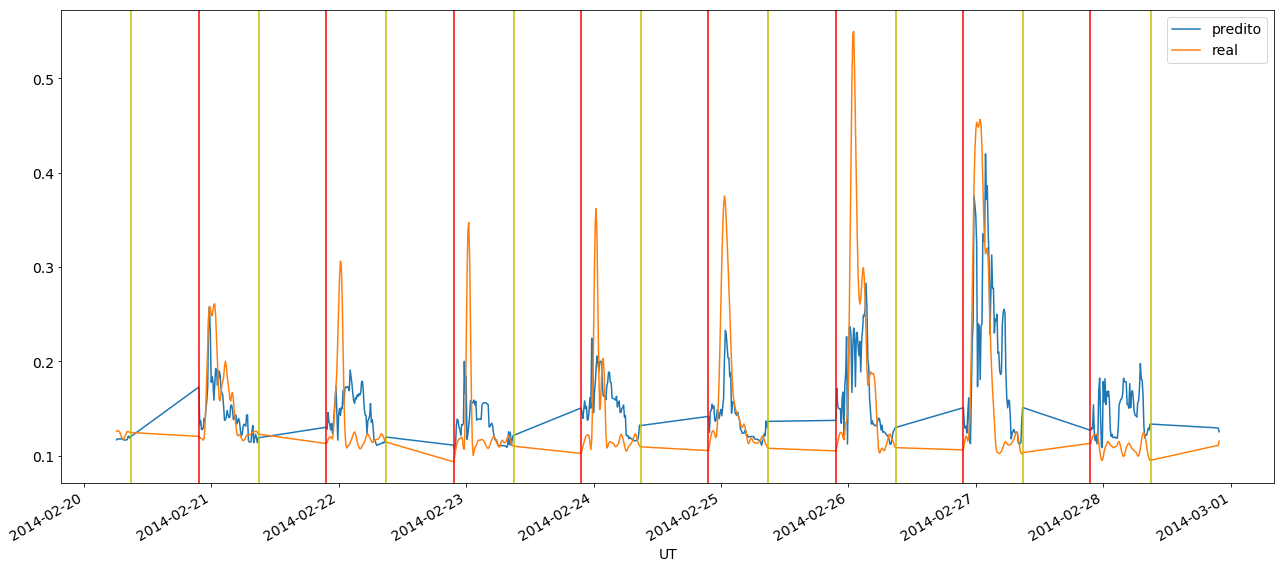


15  ->  original + tempo + mdv2 + lag
Error for the time series sample:
acc             0.884369
f1              0.617684
far             0.352048
fn             36.400000
fp             28.700000
kappa           0.055916
me              0.336668
mse             0.003808
pod             0.591011
precission      0.647952
re             24.589206
recall          0.591011
tn            445.300000
tp             52.600000
tse             1.464011
dtype: float64


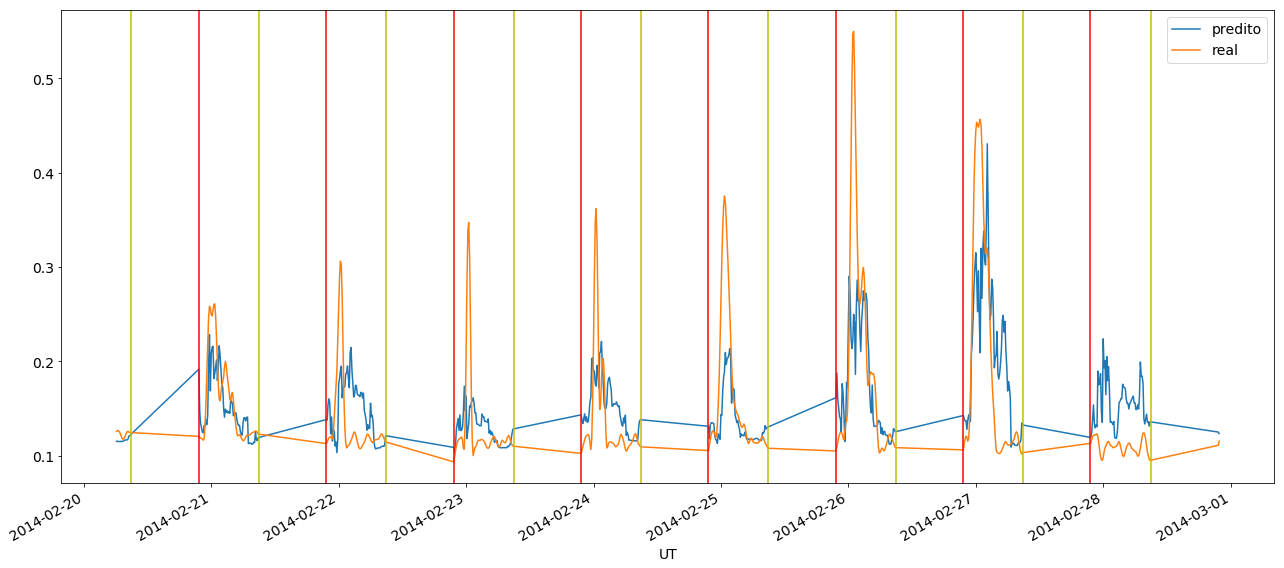


16  ->  original + tempo + lag + mdv1 + mdv2
Error for the time series sample:
acc             0.874778
f1              0.636672
far             0.411737
fn             27.200000
fp             43.300000
kappa           0.045419
me              0.333199
mse             0.003905
pod             0.694382
precission      0.588263
re             27.622614
recall          0.694382
tn            430.700000
tp             61.800000
tse             1.482633
dtype: float64


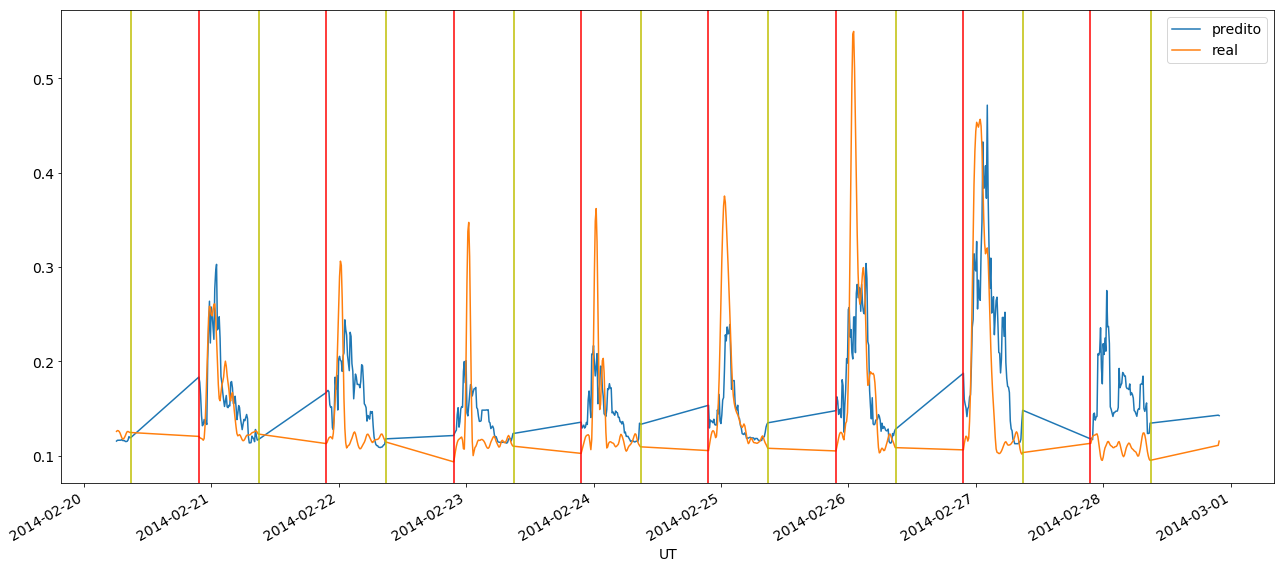


17  ->  vtec
Error for the time series sample:
acc             0.837655
f1              0.201416
far             0.544503
fn             77.400000
fp             14.000000
kappa           0.112864
me              0.379818
mse             0.005646
pod             0.130337
precission      0.455497
re             28.262851
recall          0.130337
tn            460.000000
tp             11.600000
tse             1.782866
dtype: float64


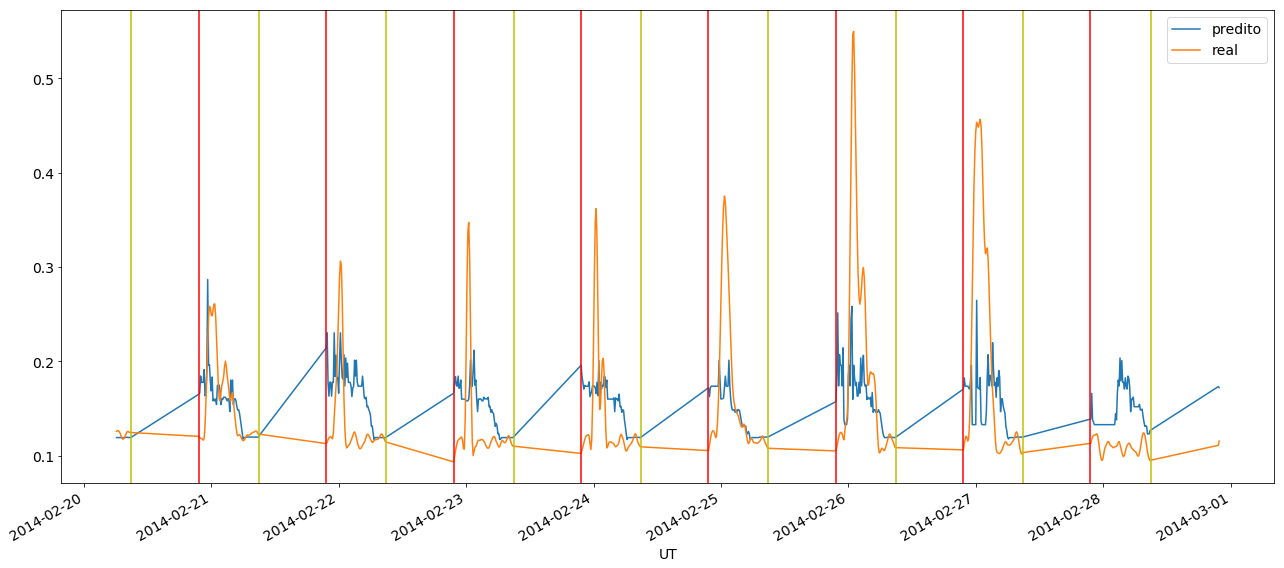


18  ->  vtec + gvtec1_dt_lag_9
Error for the time series sample:
acc             0.823623
f1              0.478201
far             0.550631
fn             43.400000
fp             55.900000
kappa           0.065353
me              0.344206
mse             0.005511
pod             0.512360
precission      0.449369
re             32.721732
recall          0.512360
tn            418.100000
tp             45.600000
tse             1.761406
dtype: float64


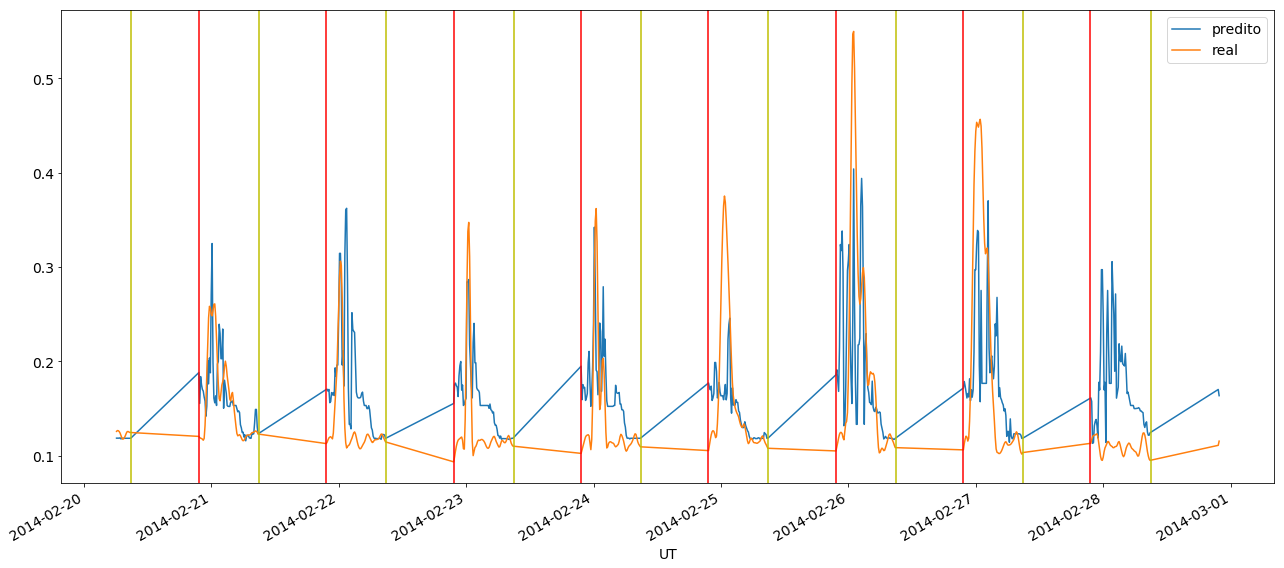


19  ->  vtec + gvtec2_dt_lag_20
Error for the time series sample:
acc             0.846181
f1              0.509264
far             0.486386
fn             44.000000
fp             42.600000
kappa           0.065953
me              0.330449
mse             0.003845
pod             0.505618
precission      0.513614
re             24.914374
recall          0.505618
tn            431.400000
tp             45.000000
tse             1.471273
dtype: float64


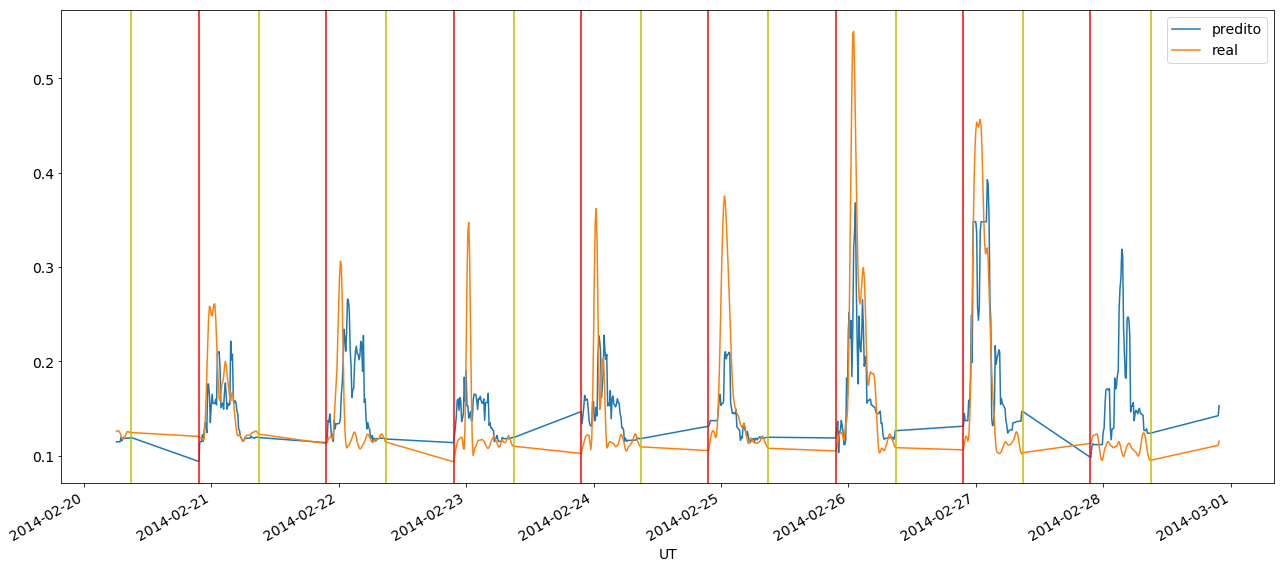


20  ->  vtec + vtec_dt + vtec_dt2
Error for the time series sample:
acc             0.840320
f1              0.523568
far             0.504040
fn             39.600000
fp             50.300000
kappa           0.060784
me              0.317335
mse             0.004890
pod             0.555056
precission      0.495960
re             30.042927
recall          0.555056
tn            423.700000
tp             49.400000
tse             1.658942
dtype: float64


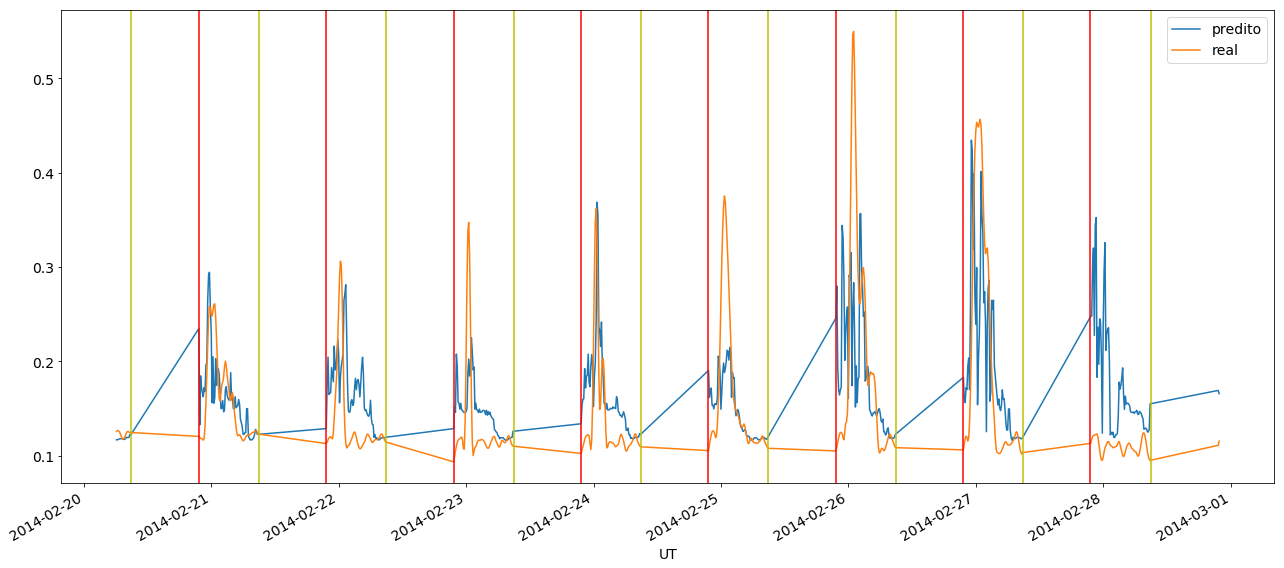


21  ->  vtec + gvtec1 + gvtec2
Error for the time series sample:
acc             0.847957
f1              0.316099
far             0.453276
fn             69.200000
fp             16.400000
kappa           0.100912
me              0.413476
mse             0.005708
pod             0.222472
precission      0.546724
re             23.872914
recall          0.222472
tn            457.600000
tp             19.800000
tse             1.792563
dtype: float64


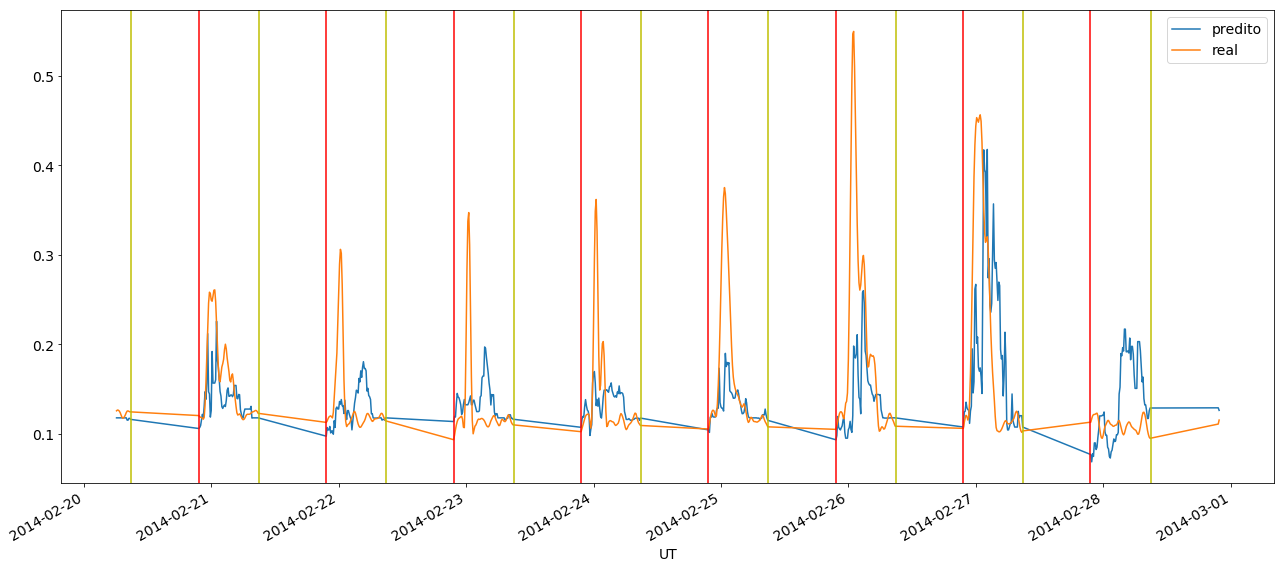


22  ->  vtec + tempo
Error for the time series sample:
acc             0.827886
f1              0.485499
far             0.539775
fn             43.200000
fp             53.700000
kappa           0.065084
me              0.337683
mse             0.005021
pod             0.514607
precission      0.460225
re             29.571181
recall          0.514607
tn            420.300000
tp             45.800000
tse             1.681221
dtype: float64


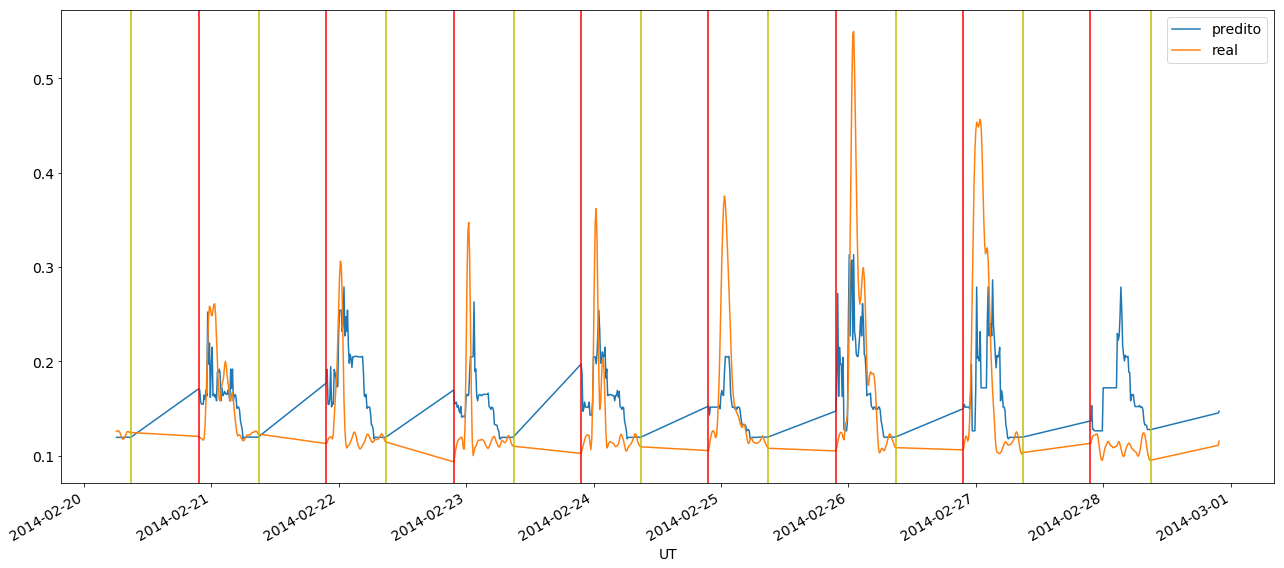


23  ->  vtec + tempo + mdv1
Error for the time series sample:
acc             0.790941
f1              0.487591
far             0.601818
fn             33.000000
fp             84.700000
kappa           0.055517
me              0.278712
mse             0.005850
pod             0.629213
precission      0.398182
re             35.526505
recall          0.629213
tn            389.300000
tp             56.000000
tse             1.814210
dtype: float64


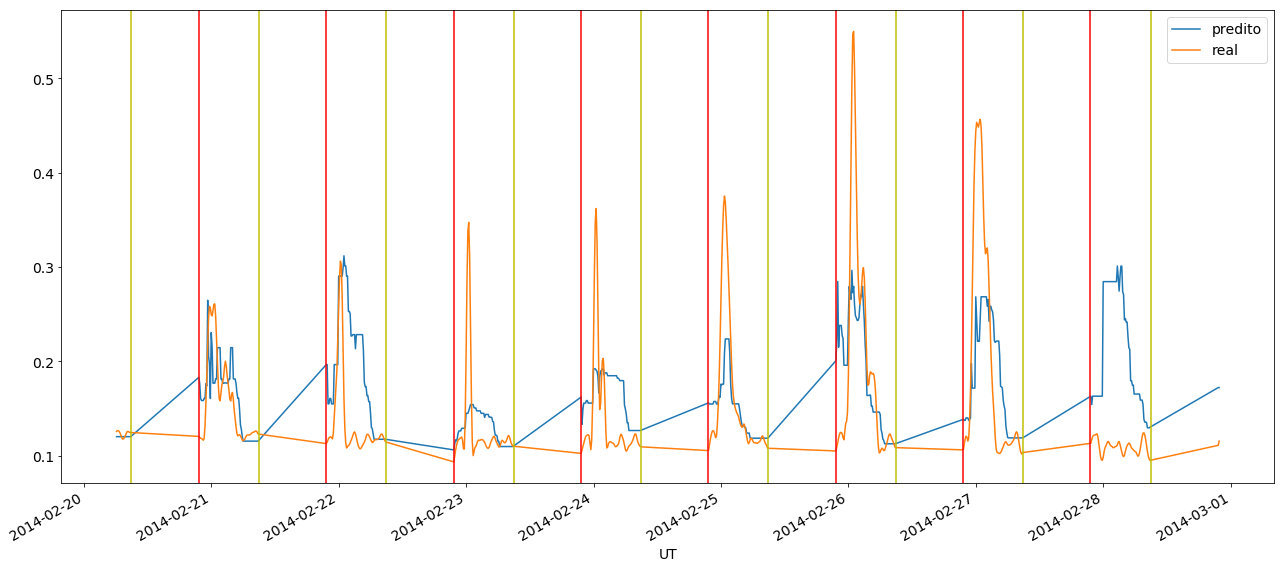


24  ->  vtec + tempo + lag
Error for the time series sample:
acc             0.833570
f1              0.550991
far             0.519511
fn             31.500000
fp             62.200000
kappa           0.052207
me              0.306097
mse             0.004189
pod             0.646067
precission      0.480489
re             27.147991
recall          0.646067
tn            411.800000
tp             57.500000
tse             1.535222
dtype: float64


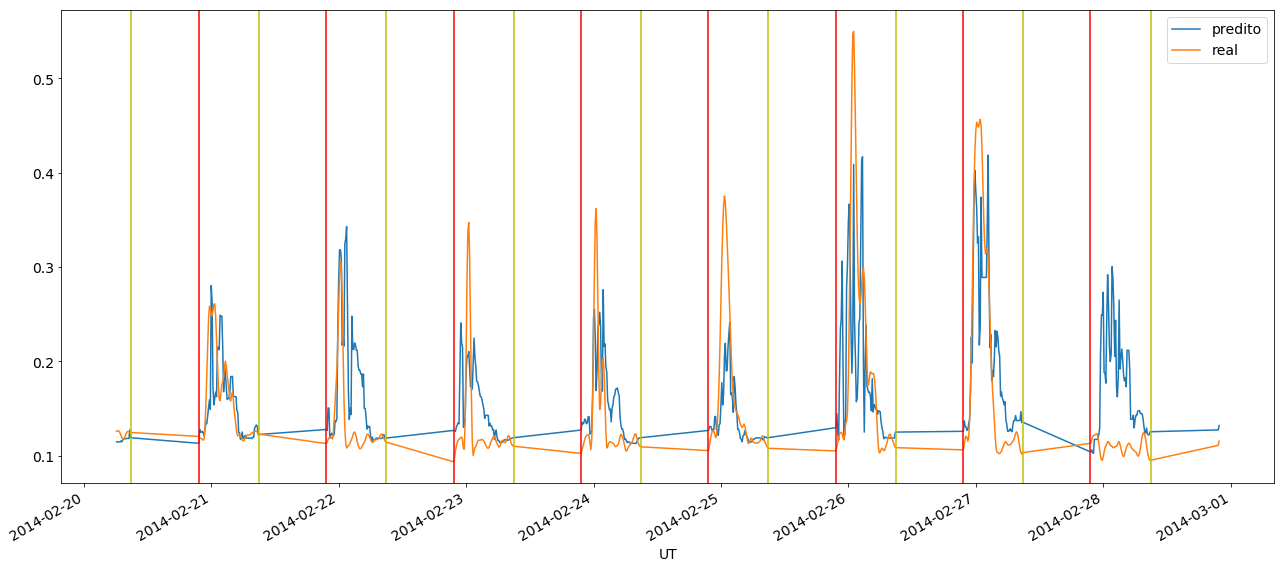


25  ->  vtec + tempo + lag + mdv1
Error for the time series sample:
acc             0.820249
f1              0.570229
far             0.541102
fn             21.900000
fp             79.300000
kappa           0.044094
me              0.278271
mse             0.004606
pod             0.753933
precission      0.458898
re             31.246381
recall          0.753933
tn            394.700000
tp             67.100000
tse             1.610121
dtype: float64


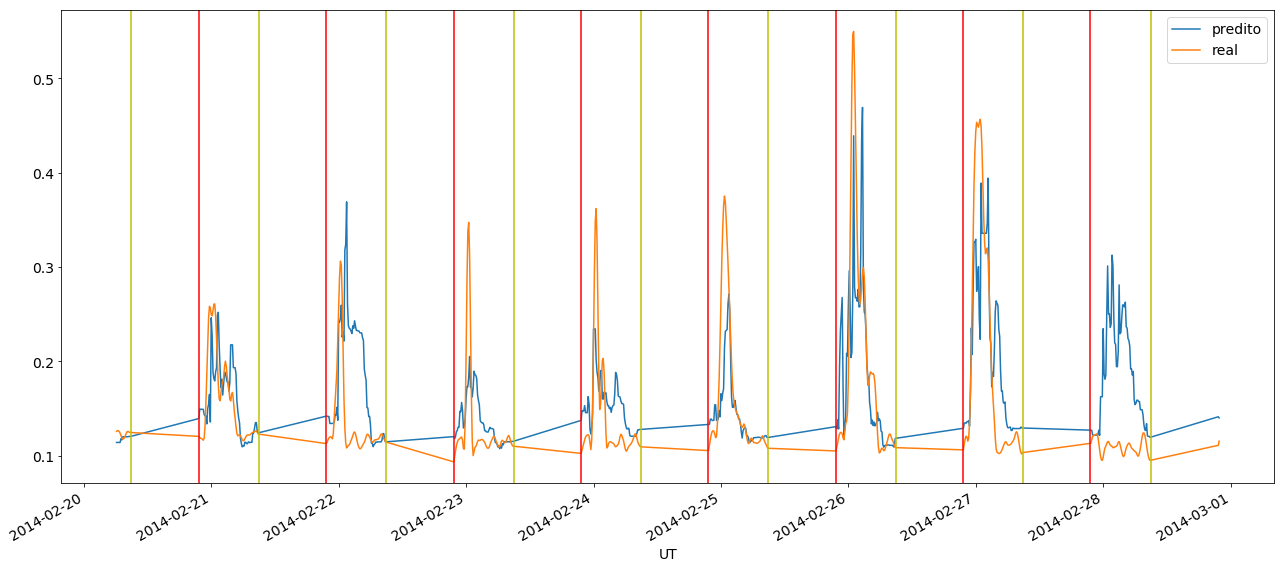


26  ->  vtec + tempo + lag + mdv2
Error for the time series sample:
acc             0.845648
f1              0.562746
far             0.489606
fn             33.100000
fp             53.800000
kappa           0.053377
me              0.298488
mse             0.004345
pod             0.628090
precission      0.510394
re             28.673263
recall          0.628090
tn            420.200000
tp             55.900000
tse             1.563708
dtype: float64


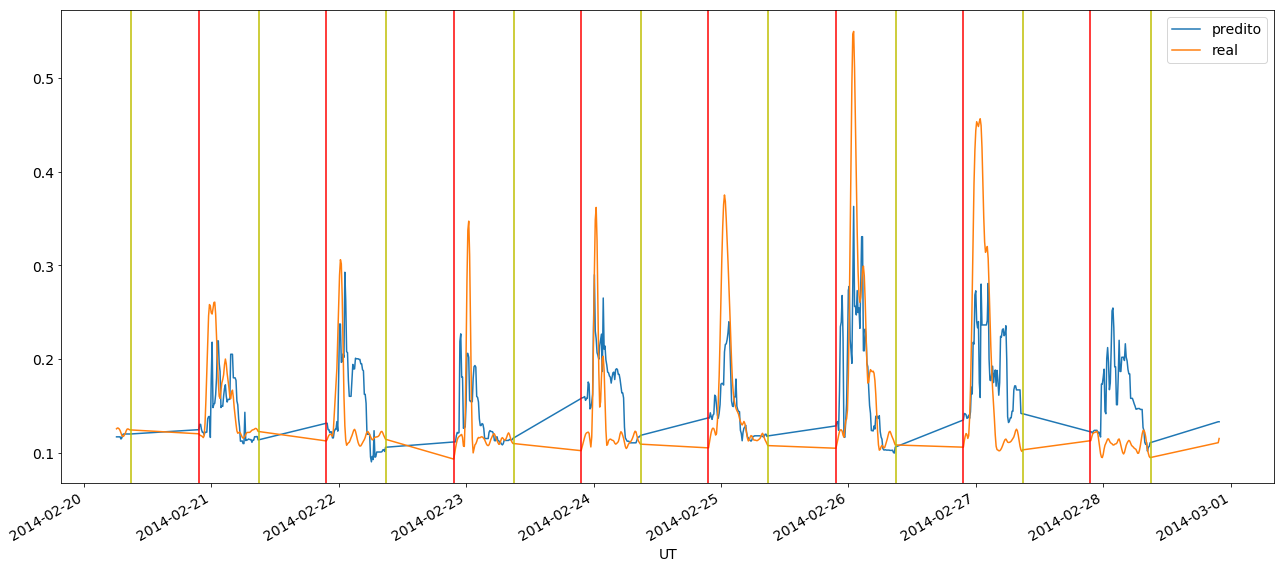


27  ->  vtec + tempo + lag + mdv1 + mdv2
Error for the time series sample:
acc             0.804973
f1              0.540974
far             0.568993
fn             24.300000
fp             85.500000
kappa           0.047261
me              0.287315
mse             0.004655
pod             0.726966
precission      0.431007
re             32.583721
recall          0.726966
tn            388.500000
tp             64.700000
tse             1.618706
dtype: float64


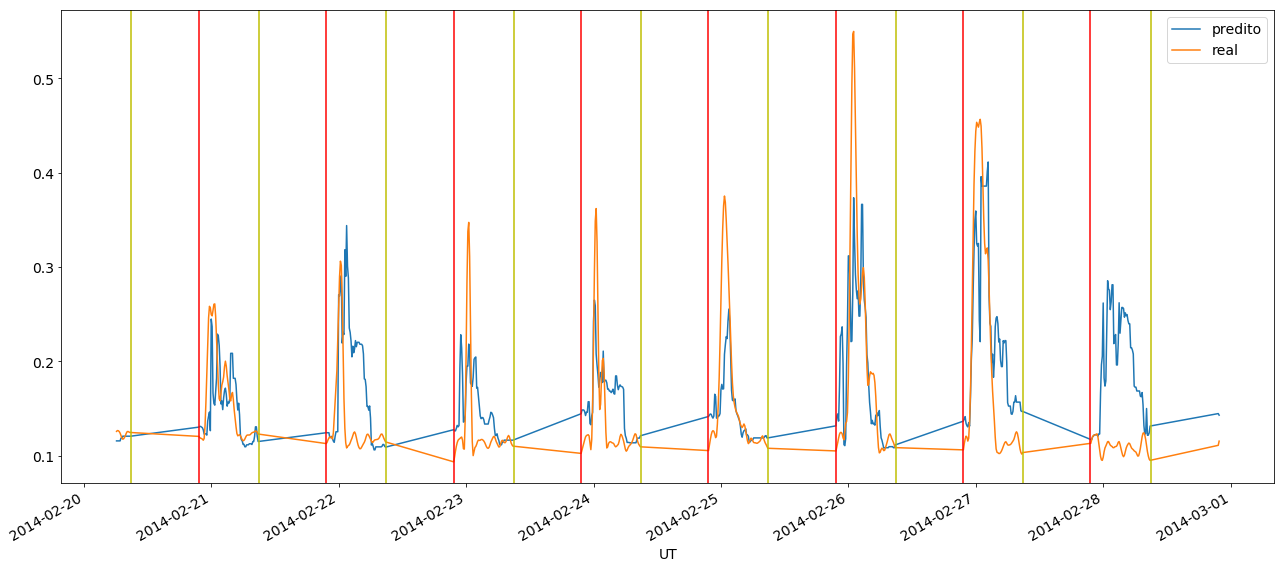

In [7]:
with open('./data/result/09_analise_all_xgboost.txt', 'w') as file:
    errors = []
    for idx, i in enumerate(set_tests):
        print(idx,' -> ', i.name)
        if param_grid is not None:
            if idx != 0:
                file.write('\n')
            file.write(idx+' -> '+i.name+'\n')
        dict_error = generate_and_avaliate_model(model=XGBRegressor,
                                                 df=df,
                                                 instances_set=list(i.set),
                                                 target='s4',
                                                 save=True,
                                                 grid_search=True,
                                                 param_grid=param_grid,
                                                 file_to_save_model='./images/09_analise_all_xgboost/' + i.name + '.eps ')
        dict_error['name'] = i.name
        errors.append(dict_error)
        print()

In [8]:
df = pd.DataFrame(errors) 
df.index = df['name']
del df['name']
df = df[['tp', 'tn', 'fp', 'fn', 're', 'pod', 'far', 'acc', 'precission', 'recall', 'f1', 'kappa', 'me', 'tse', 'mse']]
pd.set_option('precision', 4)

In [9]:
with open('./data/result/09_analise_all_xgboost', 'a') as file:
    file.write(df.to_string())